In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from feature_engine.timeseries.forecasting import ExpandingWindowFeatures
from sktime.utils.plotting import plot_series

### Data
We will work with the hourly electricity demand dataset. It is the electricity demand for the state of Victora in Australia from 2002 to the start of 2015. 


In [4]:
data = pd.read_csv('../../Datasets/victoria_electricity_demand.csv', 
                   usecols=["demand", "temperature", "date_time"], 
                   index_col='date_time', parse_dates=['date_time'])

# For this demo we will use a subset of the data
data = data.loc["2010":]

# plot
plot_series(data['demand'])
plt.xticks(rotation=30);

<img src='./plots/victoria-electricity-deman-2010-2015.png'>

## Computing expanding windows features using Pandas

In [5]:
df = data.copy()

In [6]:
def mad(x):
    return np.median(np.abs(x-np.median(x)))

In [9]:
result_pandas = (
    df['demand']
    .expanding()
    .agg(['mean','std', mad])
    .shift(periods=1, freq='H')
    .add_prefix('expanding_window_')
)

In [10]:
result_pandas.head()

,expanding_window_mean,expanding_window_std,expanding_window_mad
date_time,,,
2010-01-01 01:00:00,8314.448682,NaN,0.000000
2010-01-01 02:00:00,8290.817989,33.418847,23.630693
2010-01-01 03:00:00,7992.054807,518.012283,47.261386
2010-01-01 04:00:00,7732.052986,670.294667,459.960119
2010-01-01 05:00:00,7559.082315,697.542450,527.328810


In [14]:
result_pandas.plot(subplots=True, figsize=(18,8));

<img src='./plots/expanding-window-stats-electricity-demand-pandas.png'>

## Expanding window stats using Feature Engine

In [17]:
from feature_engine.timeseries.forecasting import ExpandingWindowFeatures

transformer = ExpandingWindowFeatures(variables=['demand', 'temperature'], functions=['mean', 'std'], freq="1H")

result_feature_engine = transformer.fit_transform(df)

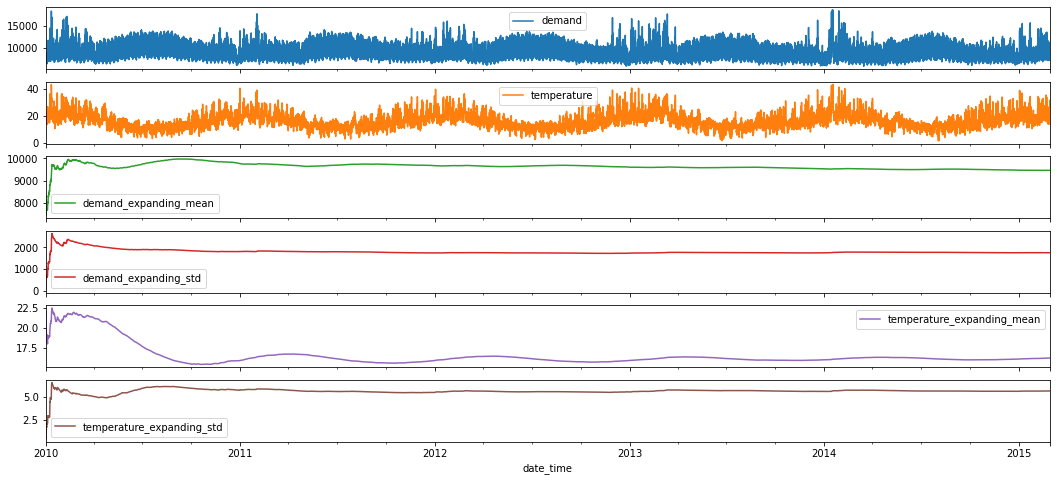

In [18]:
result_feature_engine.plot(subplots=True, figsize=(18,8));

#### In practice, expanding windows are used less often than rolling windows because the most recent time periods tend to be more useful for forecasting. Exponential weights are normally combined with expanding windows to give more weight to recent data. 